Making an AD Leo SED for comparison with others.

In [328]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
from craftroom import resample
from scipy.interpolate import interp1d
from astropy.convolution import convolve, Box1DKernel


%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

We have a 1000A+ spectrum from http://vpl.astro.washington.edu/spectra/stellar/mstar.htm, plus EUVE data

In [329]:
w1, f1, e1 = np.loadtxt('adleo_dat.txt', unpack=True, usecols=(0,1,2), skiprows=175)
w1, f1, e1 = w1*10000, f1*1000, e1*1000

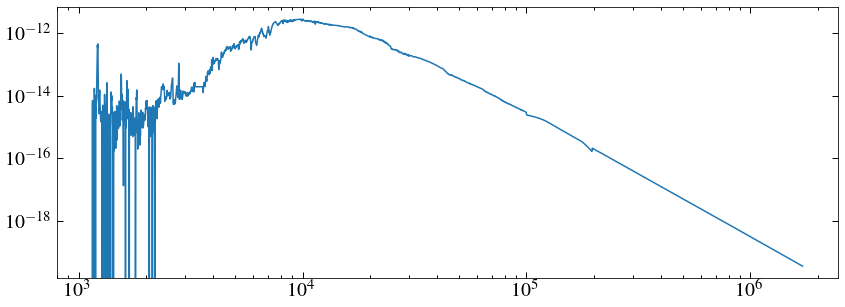

In [330]:
plt.plot(w1,f1)
plt.xscale('log')
plt.yscale('log')

In [331]:
path = '/media/david/5tb_storage1/ad_leo/EUVE/'
datasets = glob.glob('{}ad_leo*'.format(path))
datasets

['/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__0003091327N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9303010544D',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9303010544N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9605030109N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904021609N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904050046N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904092045N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904170332N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904251629N',
 '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9905061641N']

Data is in the first extension of the "vo.fits" file

/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__0003091327N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9303010544D
1200
70.05000305175781 189.95000483840704 75.75000313669443
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9303010544N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9605030109N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904021609N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904050046N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904092045N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904170332N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9904251629N
2750
70.05 699.8 75.75
/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9905061641N
2750
70.05 699.8 75.75


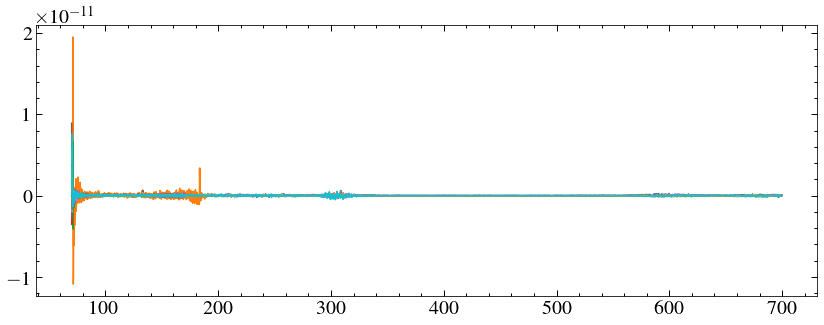

In [332]:
for ds in datasets:
    print (ds)
    spec = glob.glob('{}/*vo.fits'.format(ds))[0]
    data = fits.getdata(spec, 1)[0]
    print(len(data['Wave']))
    print(data['WAVE'][0], data['WAVE'][-1], data['WAVE'][57])
    plt.plot(data['WAVE'], data['FLUX'])
   # plt.show()
   

In [333]:
hdul = fits.open(glob.glob('{}/*vo.fits'.format(datasets[0]))[0])
hdul.info()

Filename: /media/david/5tb_storage1/ad_leo/EUVE/ad_leo__0003091327N/ad_leo__0003091327N_vo.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      86   ()      
  1  Spectral Container    1 BinTableHDU    126   1R x 2C   [2750E, 2750E]   


In [334]:
hdul[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.4b           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                22000 /Number of bytes per row                         
NAXIS2  =                    1 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    2 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** Column names ***                                                   
COMMENT                                                                         
TTYPE1  = 'WAVE    '           /                                                
TTYPE2  = 'FLUX    '        

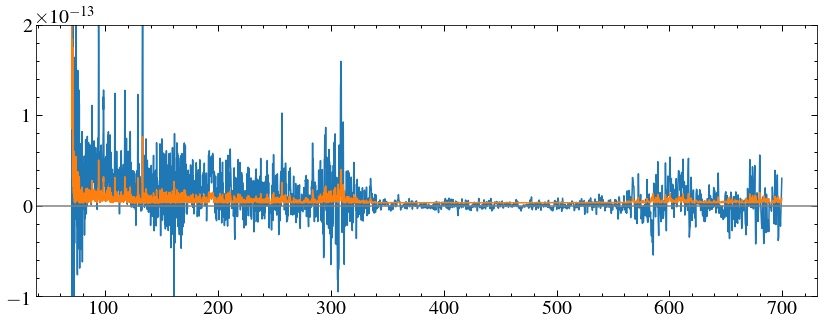

In [335]:
short = '/media/david/5tb_storage1/ad_leo/EUVE/ad_leo__9303010544D' #missing sw, just junk it for now
fa = []
for ds in datasets:
    if ds != short: 
        spec = glob.glob('{}/*vo.fits'.format(ds))[0]
        data = fits.getdata(spec, 1)[0]
        w2 = data['WAVE']
        fa.append(data['FLUX'])
f2 = np.mean(fa, axis=0)
es = abs(f2*0.1) #staistical error
esn = abs(f2*0.23)
ed = np.full(len(f2), np.std(f2[(w2 > 350) &(w2 < 550)])) #nosise of the gap
e2 = np.sum([es**2, ed**2, esn**2], axis=0)**0.5

plt.plot(w2, f2)
plt.ylim(-0.1e-12, 0.2e-12)
plt.axhline(0, c='0.5')
plt.plot(w2, e2)
#plt.yscale('log')  

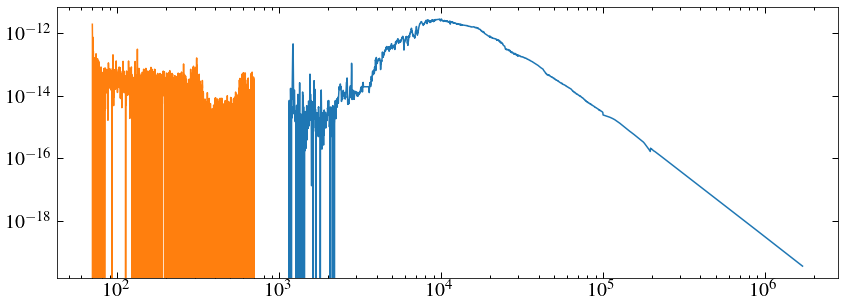

In [336]:
plt.plot(w1, f1)
plt.plot(w2, f2)
plt.xscale('log')
plt.yscale('log')

In [337]:
#data = hdul[1].data
#plt.plot(np.arange(len(data[0][0])), data[0][0])
#data[0][0]
#data.names


In [338]:
#plt.plot(data[0]['WAVE'], data[0]['FLUX'])

Add in a linksy model for the missing EUV. There's also a STIS E140M spectrum on MAST. AB gave me the old Chandra spectra.

In [339]:
lya = 9.97e-12# ergs cm-2 s-1

In [340]:
cpath = '/media/david/5tb_storage1/ad_leo/chandra/'
cfiles = glob.glob('{}*.sav'.format(cpath))
cfiles

['/media/david/5tb_storage1/ad_leo/chandra/adleo_orders.sav',
 '/media/david/5tb_storage1/ad_leo/chandra/adleo_orders2.sav']

In [341]:
cdata = readsav(cfiles[0])

In [342]:
cdata.keys()

dict_keys(['afilem1', 'afilep1', 'avgdiff', 'binavg', 'binhi', 'binlo', 'bin_hi', 'bin_lo', 'bkg_dn', 'bkg_tot', 'bkg_up', 'c', 'channel', 'counts', 'dataset', 'diff', 'exptime', 'ffile', 'fluxem1', 'fluxem1heg', 'fluxep1', 'fluxep1heg', 'fluxm1', 'fluxm1heg', 'fluxp1', 'fluxp1heg', 'h', 'i', 'indir', 'irow', 'j', 'm1heg', 'm1hegbkg', 'm1hegbkgerr', 'm1hegerr', 'm1hegnet', 'm1herr', 'm1hwave', 'm1meg', 'm1megbkg', 'm1megbkgerr', 'm1megerr', 'm1megnet', 'm1merr', 'm1wave', 'ncols', 'nsamp', 'p1heg', 'p1hegbkg', 'p1hegbkgerr', 'p1hegerr', 'p1hegnet', 'p1herr', 'p1hwave', 'p1meg', 'p1megbkg', 'p1megbkgerr', 'p1megerr', 'p1megnet', 'p1merr', 'p1wave', 'scal', 'specresp', 'spec_num', 'stat_err', 'tg_m', 'tg_part', 'tg_srcid', 'type', 'types', 'unit', 'units', 'x', 'xhead', 'y'])

(0.0, 2e-11)

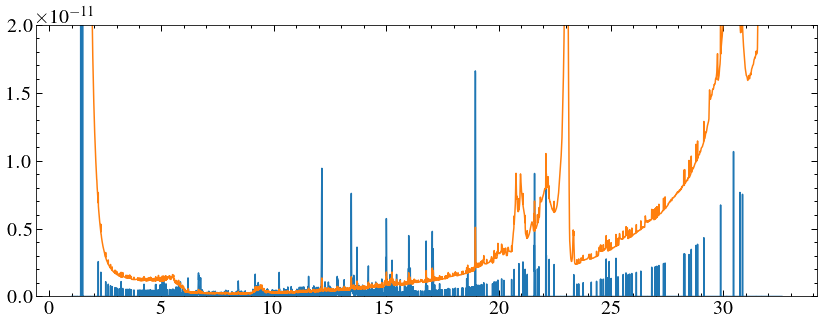

In [343]:
plt.plot(cdata.p1wave, cdata.fluxp1)
plt.plot(cdata.p1wave, cdata.fluxep1)
#plt.plot(cdata.p1hwave, cdata.fluxp1heg)
#plt.plot(cdata.m1wave, cdata.fluxm1)
#plt.plot(cdata.m1hwave, cdata.fluxm1heg)
#plt.yscale('log')
plt.ylim(0, 20e-12)

In [344]:
def spectra_adder(f_array, e_array):
    """
    Returns a variance-weighted coadd with standard error of the weighted mean (variance weights, scale corrected).
    f_array and e_arrays are collections of flux and error arrays, which should have the same lenth and wavelength scale
    """
    weights = 1 / (e_array**2)
    #f_array = np.ma.array(f_array, mask = [(f_array == 0)])
    flux = np.average(f_array, axis =0, weights = weights)
    var = 1 / np.sum(weights, axis=0)
    rcs = np.sum((((flux - f_array)**2) * weights), axis=0) / (len(f_array)-1) #reduced chi-squared
    error = (var * rcs)**0.5
    
    #var1 = 
    return flux, var**0.5

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/david/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:425: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


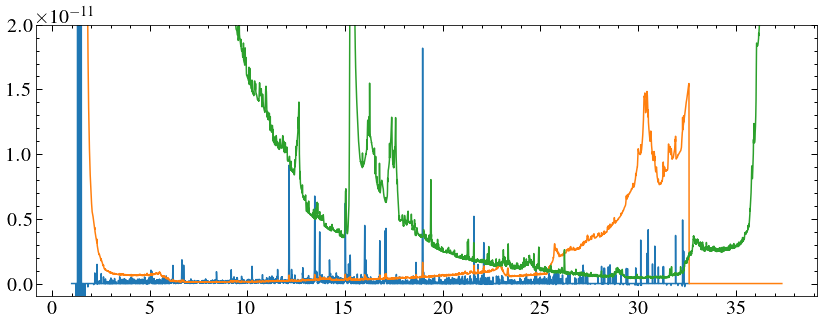

In [345]:
ws = []

for i, csav in enumerate(cfiles):
    cdata = readsav(csav)
    ws.append(cdata.p1wave)
    ws.append(cdata.m1wave)

l = 0
for wi in ws:
    if len(wi) > l:
        wc = np.array(wi)
        l = len(wi)

fs = []
es = []

    
for i, csav in enumerate(cfiles):
    cdata = readsav(csav)
    for order in ('p', 'm'):
        wi, fi, ei = cdata['{}1wave'.format(order)], cdata['flux{}1'.format(order)], cdata['fluxe{}1'.format(order)]
        #wi, fi, ei = resample.bintogrid(wi, fi, unc=ei, newx=wc)
        fi = interp1d(wi, fi, bounds_error=False, fill_value=0)(wc)
        ei = interp1d(wi, ei, bounds_error=False, fill_value=0)(wc)
        
        fs.append(fi)
        es.append(ei)

fc, ec = spectra_adder(np.array(fs), np.array(es))
wc, fc, ec = wc[::-1], fc[::-1], ec[::-1] #arrays are backwards
plt.plot(wc,fc)
plt.plot(wc, ec)
plt.ylim(-1e-12, 20e-12)

etest = np.sum(np.array(es)**2, axis=0)**0.5

plt.plot(wc, etest)
wc1, fc1, ec1 = wc, fc, ec

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/david/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:425: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


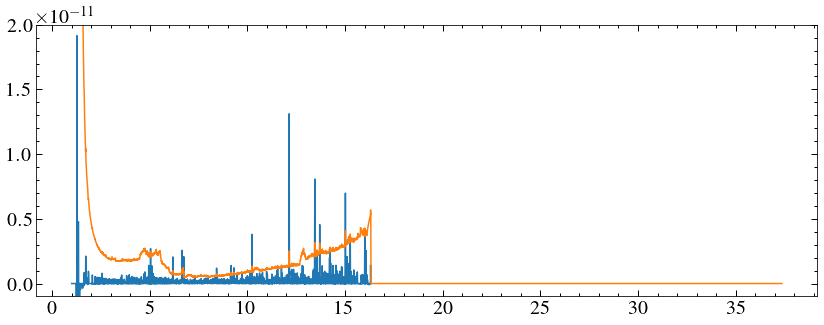

In [346]:
ws = []

for i, csav in enumerate(cfiles):
    cdata = readsav(csav)
    ws.append(cdata.p1wave)
    ws.append(cdata.m1wave)

l = 0
for wi in ws:
    if len(wi) > l:
        wc = np.array(wi)
        l = len(wi)

fs = []
es = []

    
for i, csav in enumerate(cfiles):
    cdata = readsav(csav)
    for order in ('p', 'm'):
        wi, fi, ei = cdata['{}1hwave'.format(order)], cdata['flux{}1heg'.format(order)], cdata['fluxe{}1heg'.format(order)]
        #wi, fi, ei = resample.bintogrid(wi, fi, unc=ei, newx=wc)
        fi = interp1d(wi, fi, bounds_error=False, fill_value=0)(wc)
        ei = interp1d(wi, ei, bounds_error=False, fill_value=0)(wc)
        
        fs.append(fi)
        es.append(ei)

fc, ec = spectra_adder(np.array(fs), np.array(es))
wc, fc, ec = wc[::-1], fc[::-1], ec[::-1] #arrays are backwards
plt.plot(wc,fc)
plt.plot(wc, ec)
plt.ylim(-1e-12, 20e-12)

wc2, fc2, ec2 = wc, fc, ec

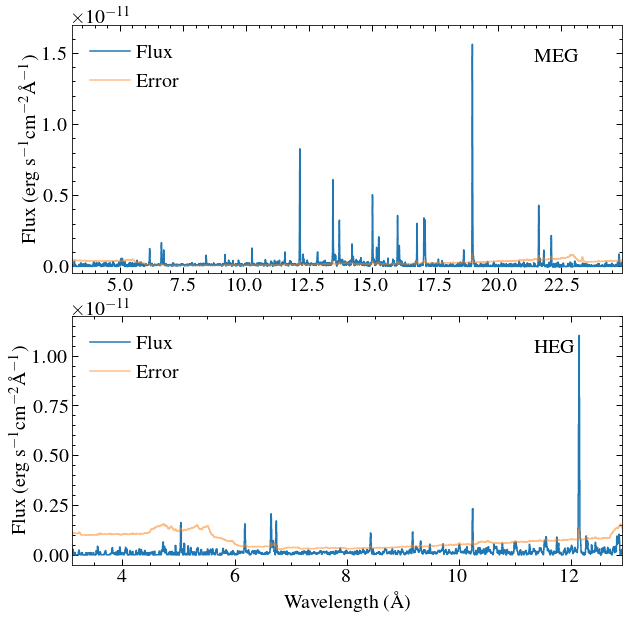

In [347]:
#plt.step(wc1[ec1 <10*fc1], fc1[ec1 <10*fc1], where='mid')
#plt.step(wc2, fc2, where='mid', zorder=-1)
#plt.ylim(-1e-12, 20e-12)
smooth=3
fc1s = convolve(fc1,Box1DKernel(smooth))
ec1s = convolve(ec1,Box1DKernel(smooth))/(smooth**0.5)
fc2s = convolve(fc2,Box1DKernel(smooth))
ec2s = convolve(ec2,Box1DKernel(smooth))/(smooth**0.5)

plt.figure(figsize=(9, 9))
plt.subplot(211)
plt.step(wc1, fc1s, where='mid', label='Flux')
plt.step(wc1, ec1s, alpha=0.5, where='mid', label='Error')
plt.xlim(3.1,24.9)
plt.ylim(-0.5e-12, 17.e-12)
plt.annotate('MEG', (0.84, 0.85),xycoords='axes fraction')
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')
plt.legend(loc=2)


plt.subplot(212)
plt.step(wc2, fc2s, where='mid', label='Flux')
plt.step(wc2, ec2s, alpha=0.5, where='mid', label='Error')
plt.xlim(3.1,12.9)
plt.ylim(-0.5e-12, 12.e-12)
plt.annotate('HEG', (0.84, 0.85),xycoords='axes fraction')
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')
plt.xlabel('Wavelength (\AA)')
plt.legend(loc=2)
plt.tight_layout()
plt.subplots_adjust(hspace=0.17)
plt.savefig('ad_leo_chandra.pdf')

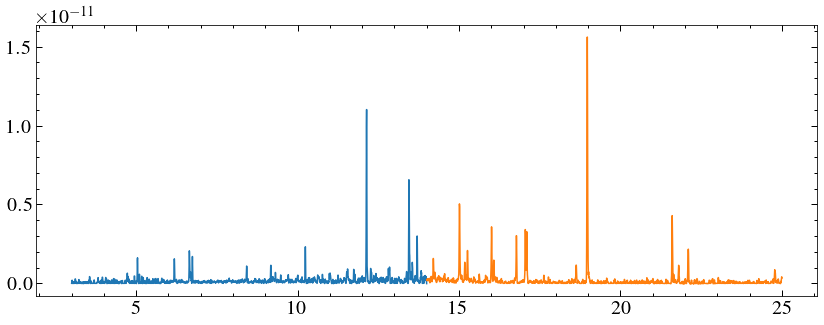

In [348]:
#clean chandra
maskh = (wc2 >= 3) & (wc2 <= 14)
wch, fch, ech = wc2[maskh], fc2s[maskh], ec2s[maskh]
plt.plot(wch, fch)
maskm = (wc1 >wch[-1]) & (wc1 <=25)
wcm, fcm, ecm = wc1[maskm], fc1s[maskm], ec1s[maskm]
plt.plot(wcm,fcm)

Good good. Linsky models next, not sure if the E140M improves things but can check (grab from starcat?)

In [349]:
import linsky_euv

In [350]:
lya = 9.97e-12# ergs cm-2 s-1
parallax = 201.36831861385065e-3
wl, fl =linsky_euv.euv_estimator(lya, 1/parallax, 'ad_leo', save=True)

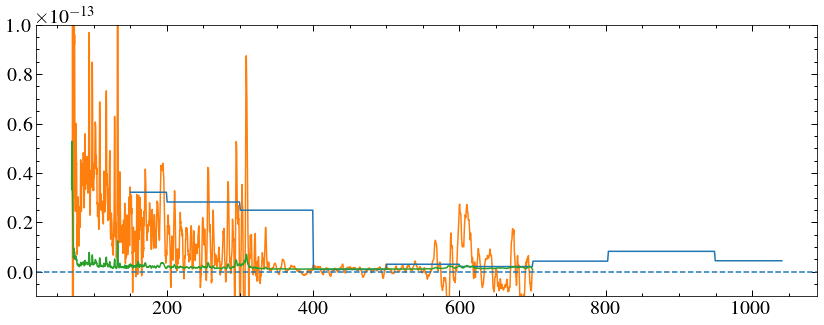

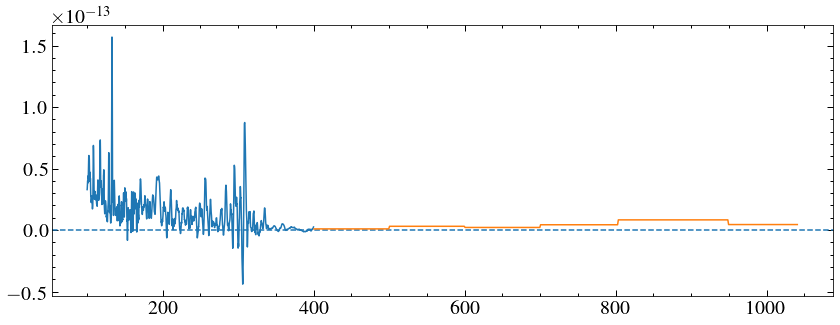

In [351]:
plt.plot(wl, fl)
smooth=10
f2s = convolve(f2,Box1DKernel(smooth))
e2s = convolve(e2,Box1DKernel(smooth))/(smooth**0.5)

plt.plot(w2, f2s, zorder=+1)
plt.plot(w2, e2s)
plt.ylim(-0.1e-13, 1e-13)
plt.axhline(0, ls='--')
plt.show()

maskd = (w2 >100) &(w2 <400)# | (w2 >600)
plt.plot(w2[maskd], f2s[maskd])
plt.axhline(0, ls='--')
maskm = (wl>400)# & (wl<600) &(w1 > )
plt.plot(wl[maskm], fl[maskm])
#plt.yscale('log')

w_euv, f_euv, e_euv = w2[maskd], f2s[maskd], e2s[maskd]
w_l14, f_l14, e_l14 = wl[maskm], fl[maskm], np.zeros(len(fl[maskm]))

In [352]:
np.diff(w2)

array([0.09999847, 0.09999847, 0.1000061 , ..., 0.39996338, 0.4000244 ,
       0.39996338], dtype=float32)

#See how it all looks, then cut it down

(1e-16, 1.3355699655349188e-10)

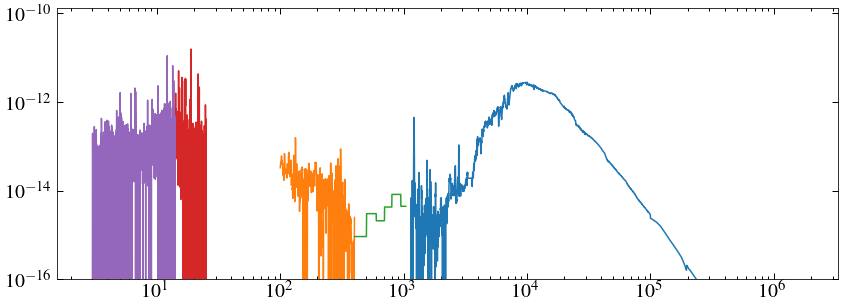

In [353]:
plt.plot(w1, f1)
#plt.plot(w2, f2)
#plt.plot(wc1, fc1)
#plt.plot(wc2, fc2)
plt.plot(w_euv, f_euv)
plt.plot(w_l14, f_l14)
plt.plot(wcm, fcm)
plt.plot(wch, fch)
#plt.plot(wl, fl)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-16)

In [391]:
#https://casa.colorado.edu/~ayres/StarCAT/
stispath = '/media/david/5tb_storage1/ad_leo/stis/h_ad-leo_e140m-1425_020x020_51613-52427_spc.fits'
hdul = fits.open(stispath)

In [392]:
hdul.info()


Filename: /media/david/5tb_storage1/ad_leo/stis/h_ad-leo_e140m-1425_020x020_51613-52427_spc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   ()      
  1  E140M-1425_020X020_51613-52427    1 BinTableHDU     22   1R x 4C   [77120D, 77120E, 77120E, 77120I]   


In [393]:
data = hdul[1].data[0]


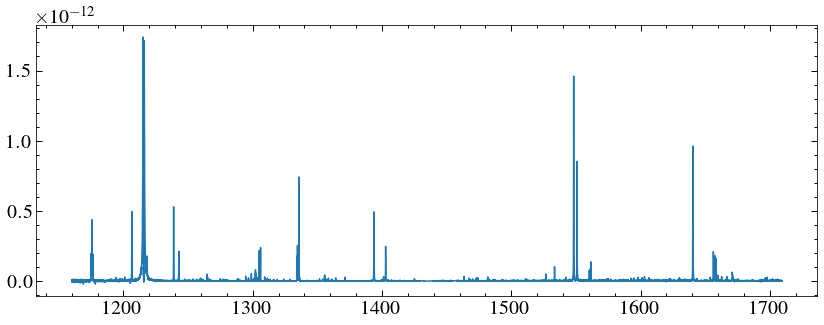

In [394]:
ws, fs, es, dqs =data['WAVE'],data['FLUX'], data['ERROR'],data['DQ'] 
mask = (ws > 1160) & (dqs ==0)
ws, fs, es = ws[mask], fs[mask], es[mask]
plt.plot(ws, fs)

(-1e-14, 1e-14)

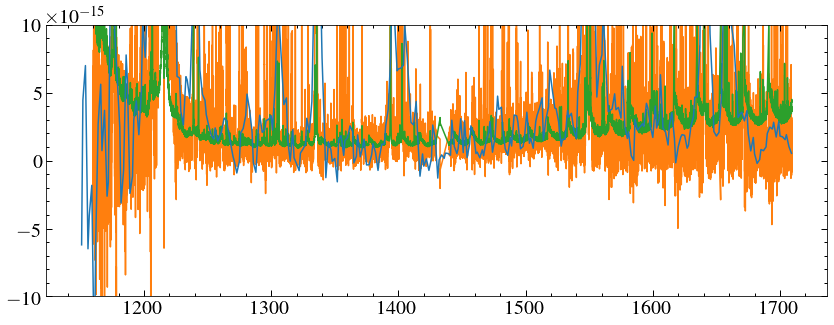

In [370]:
plt.plot(w1[(w1 < ws[-1])], f1[(w1 < ws[-1])] )
plt.plot(ws, fs, zorder=-1)
plt.plot(ws, es, zorder=-1)
plt.ylim(-0.1e-13, 0.1e-13)

Not sure if the Lyman alpha is a reconstruction? No. If not I can make one via guesswork from https://arxiv.org/pdf/astro-ph/0503372.pdf

In [359]:

#plt.plot(w1, f1)
#plt.xlim(1200, 1250)
#plt.ylim(0, 0.5e-12)
lya = 9.97e-12# ergs cm-2 s-1
peak = 13e-12
fwhm = 1216.05-1213.05
std = fwhm/2.35482
test_int = peak*std*(2*np.pi)*0.5
print(test_int)

5.203035199718107e-11


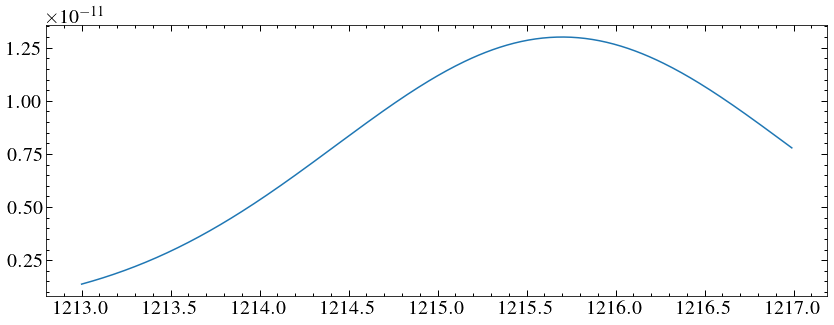

In [373]:
lyamod = models.Gaussian1D(peak, 1215.7, std)
lyarange = np.arange(1213, 1217, 0.01)
plt.plot(lyarange, lyamod(lyarange))

FUSE?

In [360]:
fusepath = '/media/david/5tb_storage1/ad_leo/fuse/MAST_2020-08-25T2043/FUSE/a0220104000/a022010400000nvo4ttagfcal_vo.fits'
#hdul.close()
hdul= fits.open(fusepath)
hdul.info()

Filename: /media/david/5tb_storage1/ad_leo/fuse/MAST_2020-08-25T2043/FUSE/a0220104000/a022010400000nvo4ttagfcal_vo.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     366   ()      
  1  Spectral Container    1 BinTableHDU    134   1R x 3C   [22309E, 22309E, 22309E]   


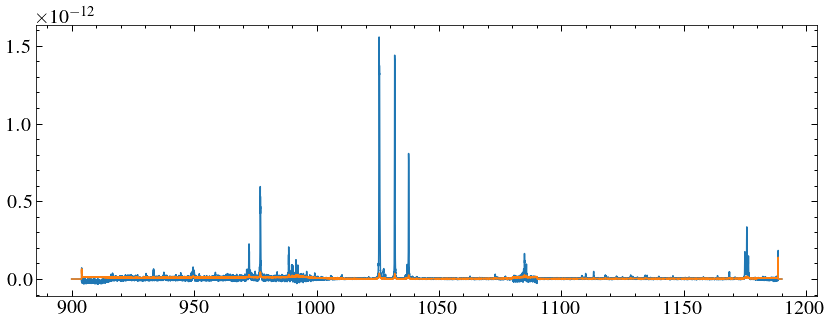

In [361]:
data = hdul[1].data[0]
plt.plot(data['WAVE'], data['FLUX'])
plt.plot(data['WAVE'], data['SIGMA'])

In [362]:
wfuse, ffuse, efuse= data['WAVE'], data['FLUX'], data['Sigma']
hdul.close()

(0.0, 6e-13)

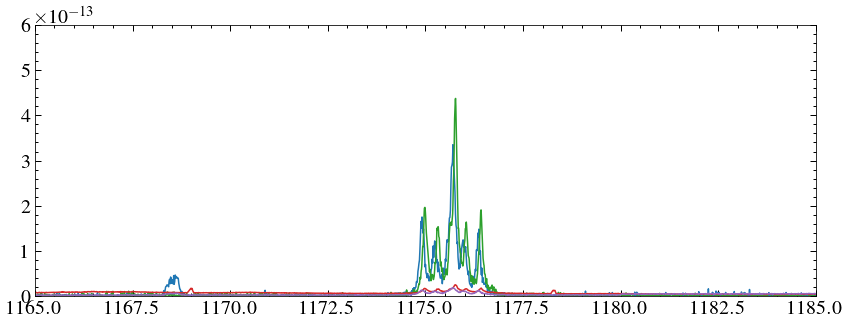

In [363]:
plt.plot(wfuse, ffuse)
plt.plot(w_l14, f_l14)
plt.plot(ws, fs)
plt.plot(ws, es)
plt.plot(wfuse, efuse)
plt.xlim(1165, 1185)
plt.ylim(0, 0.6e-12)

In [364]:
mask = w1 > ws[-1]
w_o, f_o, e_o = w1[mask], f1[mask], e1[mask] 

In [365]:
maskf = (wfuse < ws[0])
wfuse, ffuse, efuse = wfuse[maskf], ffuse[maskf], efuse[maskf]
maskm = (wl > w_euv[-1]) & (wl< wfuse[0])# & (wl<600) &(w1 > )
w_l14, f_l14, e_l14 = wl[maskm], fl[maskm], np.zeros(len(fl[maskm]))


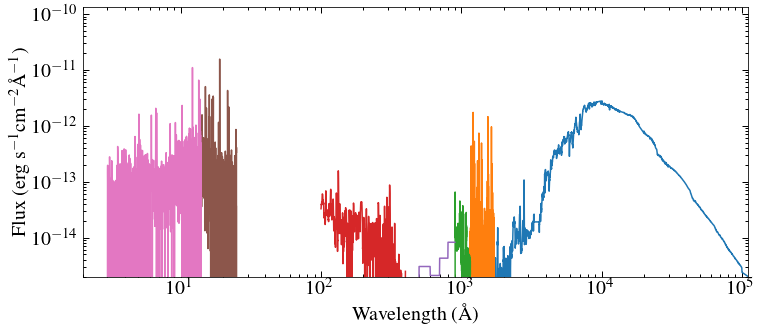

In [366]:
plt.figure(figsize=(11, 5))
plt.plot(w_o, f_o)
plt.plot(ws, fs)
plt.plot(wfuse, efuse)
plt.plot(w_euv, f_euv)
plt.plot(w_l14, f_l14)
plt.plot(wcm, fcm)
plt.plot(wch, fch)
#plt.plot(wl, fl)
plt.xscale('log')
plt.yscale('log')
plt.ylim(2e-15)
plt.xlim(2, 1.1e5)
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')
plt.xlabel('Wavelength (\AA)')
plt.tight_layout()
plt.savefig('ad_leo_draft.png')

Needs a Lya line and ideally a apec model. Make a fake apec model for now...

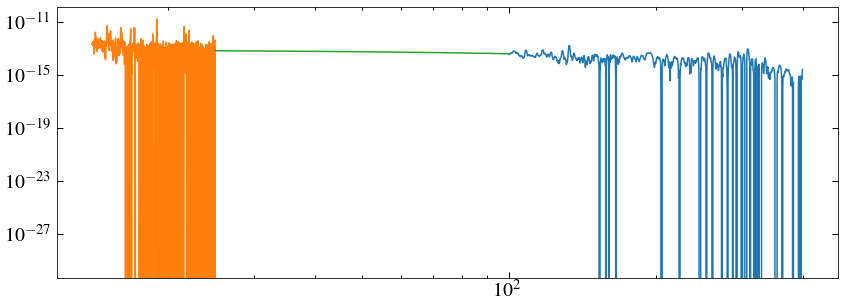

In [444]:
plt.plot(w_euv, f_euv)
plt.plot(wcm, fcm)
plt.xscale('log')
plt.yscale('log')
fitter = fitting.LinearLSQFitter()

w2fit = np.concatenate((wcm[(wcm >20) &(fcm >0)] , w_euv[w_euv <110]))
f2fit = np.concatenate((fcm[(wcm >20) & (fcm >0)], f_euv[w_euv <110]))

n_init = models.Polynomial1D(1)# + models.Polynomial1D(3)
nfit = fitter(n_init, w2fit,np.log10(f2fit))
w_gap = np.arange(int(wcm[-1])+1, w_euv[0])
f_gap = 10**nfit(w_gap)
e_gap = np.zeros(len(w_gap))
plt.plot(w_gap, 10**nfit(w_gap))
#print(w_gap[-1])

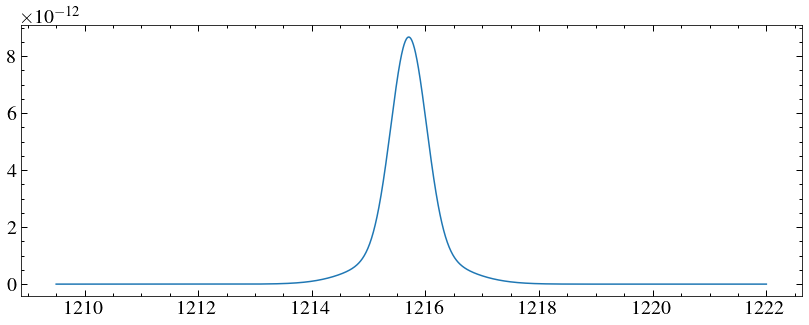

In [395]:
lyapath = '/media/david/5tb_storage1/ad_leo/lya/ADLeo_LyA_intrinsic_profile.txt'
w_lya, f_lya = np.loadtxt(lyapath, unpack=True)
plt.plot(w_lya, f_lya)

In [397]:
"""plt.plot(ws, fs)
plt.xlim(1209,1223)
plt.plot(w_lya, f_lya)
plt.ylim(-1e-13, 2e-13)"""

'plt.plot(ws, fs)\nplt.xlim(1209,1223)\nplt.plot(w_lya, f_lya)\nplt.ylim(-1e-13, 2e-13)'

(-1e-13, 4e-13)

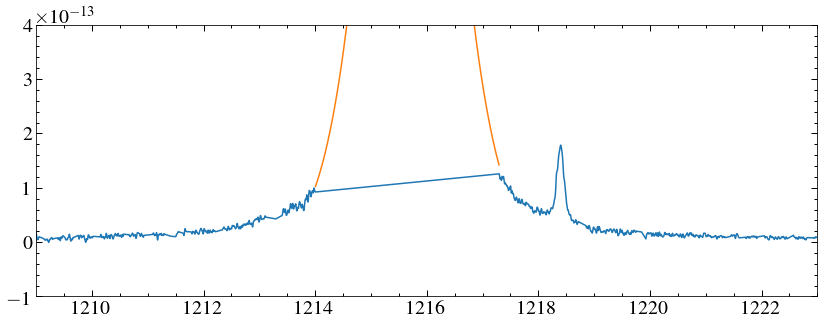

In [401]:
w_lya, f_lya = np.loadtxt(lyapath, unpack=True)
lmask = (w_lya > 1214) &(w_lya < 1217.3)
w_lya, f_lya = w_lya[lmask], f_lya[lmask]
e_lya = np.zeros(len(w_lya))

smask = (ws <= w_lya[0]) | (ws >=w_lya[-1])
w_stis, f_stis, e_stis = ws[smask], fs[smask], es[smask]

plt.plot(w_stis, f_stis)
plt.xlim(1209,1223)
plt.plot(w_lya, f_lya)
plt.ylim(-1e-13, 4e-13)

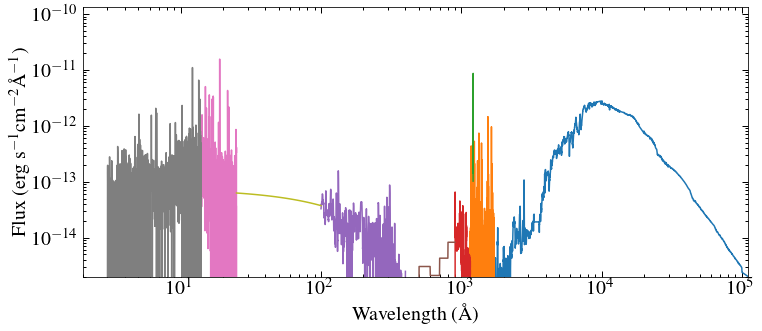

In [433]:
plt.figure(figsize=(11, 5))
plt.plot(w_o, f_o)
plt.plot(w_stis, f_stis)
plt.plot(w_lya, f_lya)
plt.plot(wfuse, efuse)
plt.plot(w_euv, f_euv)
plt.plot(w_l14, f_l14)
plt.plot(wcm, fcm)
plt.plot(wch, fch)
plt.plot(w_gap, f_gap)
#plt.plot(wl, fl)
plt.xscale('log')
plt.yscale('log')
plt.ylim(2e-15)
plt.xlim(2, 1.1e5)
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')
plt.xlabel('Wavelength (\AA)')
plt.tight_layout()
plt.savefig('ad_leo_draft.png')


In [434]:
"""plt.errorbar((5,120),(1e-13, 1e-13), yerr= [[5e-14,5e-14],[0,0]], c ='k')
plt.annotate('APEC', (20, 2e-13))

plt.errorbar((120,1100),(1e-13, 1e-13), yerr= [[5e-14,0],[0,0]], c ='k')
plt.annotate('DEM', (250, 2e-13))

plt.errorbar((1100, 4200),(1e-13, 1e-13), yerr= [[5e-14,5e-14],[0,0]], c ='k')
plt.annotate('Semi-Empirical\n Model', (2300, 2e-13), ha='center')

plt.errorbar((4200, 1000000),(1e-13, 1e-13), yerr= [[0,5e-14],[0,0]], c ='k')
plt.annotate('PHOENIX', (10000, 2e-13))
"""

"plt.errorbar((5,120),(1e-13, 1e-13), yerr= [[5e-14,5e-14],[0,0]], c ='k')\nplt.annotate('APEC', (20, 2e-13))\n\nplt.errorbar((120,1100),(1e-13, 1e-13), yerr= [[5e-14,0],[0,0]], c ='k')\nplt.annotate('DEM', (250, 2e-13))\n\nplt.errorbar((1100, 4200),(1e-13, 1e-13), yerr= [[5e-14,5e-14],[0,0]], c ='k')\nplt.annotate('Semi-Empirical\n Model', (2300, 2e-13), ha='center')\n\nplt.errorbar((4200, 1000000),(1e-13, 1e-13), yerr= [[0,5e-14],[0,0]], c ='k')\nplt.annotate('PHOENIX', (10000, 2e-13))\n"

In [461]:
#plt.plot(w_o, f_o)
#plt.plot(w_stis, f_stis)
#plt.plot(w_lya, f_lya)
#plt.plot(wfuse, efuse)
#plt.plot(w_euv, f_euv)
#plt.plot(w_l14, f_l14)
#plt.plot(wcm, fcm)
#plt.plot(wch, fch)
#plt.plot(w_gap, f_gap)

inst = np.array([], dtype=int)
for i, w in enumerate([wch, wcm, w_gap, w_euv, w_l14, wfuse, w_stis, w_lya, w_o]):
    code = np.binary_repr(i+1)
    print(code)
    inst_array = np.full(len(w), code, dtype=int)
  #  print(len(inst_array))
    inst = np.concatenate((inst, inst_array))

w_adleo = np.concatenate((wch, wcm, w_gap, w_euv, w_l14, wfuse, w_stis, w_lya, w_o))    
f_adleo = np.concatenate((fch, fcm, f_gap, f_euv, f_l14, ffuse, f_stis, f_lya, f_o)) 
e_adleo = np.concatenate((ech, ecm, e_gap, e_euv, e_l14, efuse, e_stis,  e_lya, e_o)) 

print(len(w_adleo))
print(len(inst))
args = np.argsort(w_adleo)
w_adleo, f_adleo, e_adleo, inst = w_adleo[args], f_adleo[args], e_adleo[args], inst[args] 

1
10
11
100
101
110
111
1000
1001
88331
88331


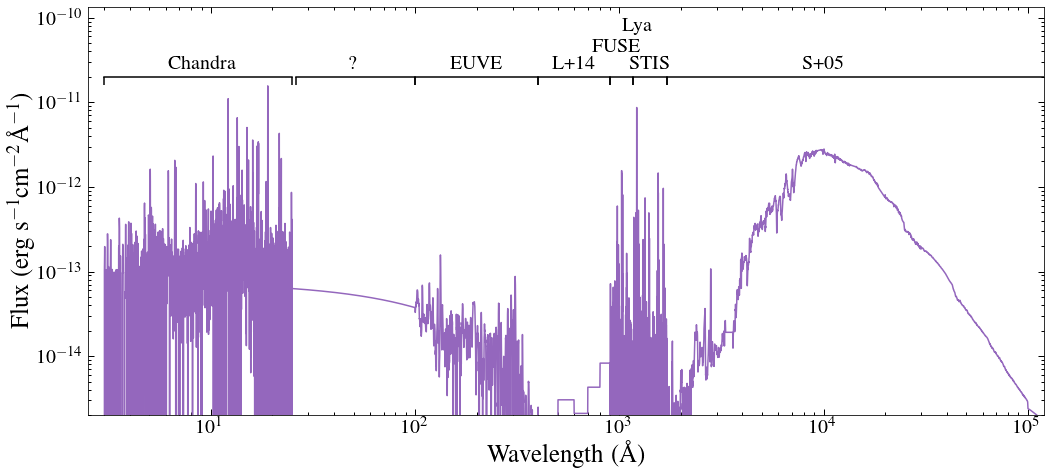

In [516]:
plt.figure(figsize=(15, 7))
plt.plot(w_adleo, f_adleo, c='C4')
plt.xscale('log')
plt.yscale('log')
plt.ylim(2e-15)
plt.xlim(2.5, 1.2e5)


labely = 2.5e-11
liney = 2e-11
ticklength = liney*0.2
plt.errorbar((3,25),(liney, liney), yerr= [[ticklength,ticklength],[0,0]], c ='k')
plt.annotate('Chandra', (9, labely), horizontalalignment='center')

plt.errorbar((26,100),(liney, liney), yerr= [[ticklength,ticklength],[0,0]], c ='k')
plt.annotate('?', (50, labely), horizontalalignment='center')


plt.errorbar((100,400),(liney, liney), yerr= [[ticklength,ticklength],[0,0]], c ='k')
plt.annotate('EUVE', (200, labely), horizontalalignment='center')

plt.errorbar((400,wfuse[0]),(liney, liney), yerr= [[ticklength,ticklength],[0,0]], c ='k')
plt.annotate('L+14', (600, labely), horizontalalignment='center')

plt.errorbar((wfuse[0], wfuse[-1]),(liney, liney), yerr= [[ticklength,ticklength],[0,0]], c ='k')
plt.annotate('FUSE', (970, 4e-11), horizontalalignment='center')

plt.errorbar((w_stis[0],w_stis[-1]),(liney, liney), yerr= [[ticklength,ticklength],[0,0]], c ='k')
plt.annotate('STIS', (1400, labely), horizontalalignment='center')

plt.annotate('Lya', (1215, 7e-11), horizontalalignment='center')

plt.errorbar((w_o[0],w_o[-1]),(liney, liney), yerr= [[ticklength,ticklength],[0,0]], c ='k')
plt.annotate('S+05', (10000, labely), horizontalalignment='center')

plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
plt.xlabel('Wavelength (\AA)', size=25)
plt.tight_layout()
plt.savefig('ad_leo_sed_v1.pdf')
plt.savefig('ad_leo_sed_v1.png')

In [507]:
version =1
savdat = Table([w_adleo, f_adleo, e_adleo, inst], names=['WAVELENGTH', 'FLUX', 'ERROR', 'INSTRUMENT'])
ascii.write(savdat, 'ad_leo_sed_v{}.ecsv'.format(version), format='ecsv', overwrite=True)

In [531]:
#w1a = np.arange(3, w_adleo[-1])
w1a, f1a= resample.bintogrid(w_adleo, f_adleo,dx=1.0)
print(len(w_adleo))
print(len(w1a))

88331
1709998


In [532]:
savdat = Table([w1a, f1a], names=['WAVELENGTH', 'FLUX'])
ascii.write(savdat, 'ad_leo_sed_v{}_1A.ecsv'.format(version), format='ecsv', overwrite=True)